In [55]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, average_precision_score
import seaborn as sns
import numpy as np

In [56]:

df = pd.read_csv('creditcard.csv')


The columns are features: due to privacity we don't know the columns name but we have time and amount: Time is the difference between the each transaction and the first transaction dataset and Amount is the transaction amount

### Correlação entre as variáveis e os dados fraudados

Interessante notar que amount não está entre as principais variáveis que se relacionam com a classe. As principais são: V17, V14, V12 ,V10, V16, V3 e V7

In [57]:
correlations = df.corr(numeric_only=True)
class_correlations = correlations['Class'].drop('Class')
sorted_class_correlations = class_correlations.sort_values(key=abs, ascending=False)
print(sorted_class_correlations)

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64


In [58]:
def avaliar_modelo(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Normal', 'Fraude'],
        yticklabels=['Normal', 'Fraude']
    )
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()
    print(pd.DataFrame(report))

## Avaliando o modelo

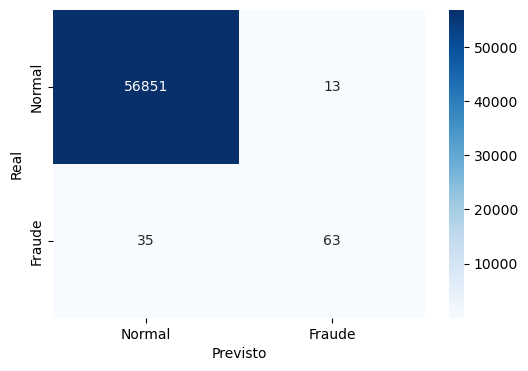

                      0          1  accuracy     macro avg  weighted avg
precision      0.999385   0.828947  0.999157      0.914166      0.999092
recall         0.999771   0.642857  0.999157      0.821314      0.999157
f1-score       0.999578   0.724138  0.999157      0.861858      0.999104
support    56864.000000  98.000000  0.999157  56962.000000  56962.000000


In [59]:
# Preparação dos dados
## Separação das variáveis
# df = df[important_features]
X = df.drop(columns=['Class'])
y = df['Class']
## Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Treinando o modelo e Avaliando desempenho
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

## Fazendo o modelo funcionar
y_pred = model.predict(X_test)
avaliar_modelo(y_test, y_pred)

## Utilizando um threshold

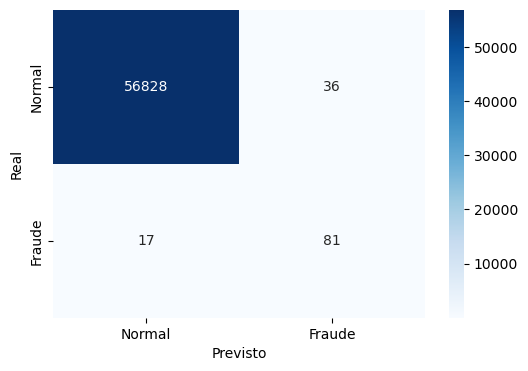

                      0          1  accuracy     macro avg  weighted avg
precision      0.999701   0.692308   0.99907      0.846004      0.999172
recall         0.999367   0.826531   0.99907      0.912949      0.999070
f1-score       0.999534   0.753488   0.99907      0.876511      0.999111
support    56864.000000  98.000000   0.99907  56962.000000  56962.000000


In [60]:
# Preparação dos dados
## Separação das variáveis
X = df.drop(columns=['Class'])
y = df['Class']
## Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Treinando o modelo e Avaliando desempenho
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1 = 2 * ( precision * recall) / (precision + recall)
best_threshold_idx = f1.argmax()
best_threshold = thresholds[best_threshold_idx]

y_pred_threshold = (y_probs >= best_threshold).astype(int)

avaliar_modelo(y_test, y_pred_threshold)

In [61]:
auc_pr = average_precision_score(y_test, y_probs)
print(f'Auc-pr: {auc_pr:.4f}')

Auc-pr: 0.7424
